In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import sklearn.metrics

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [3]:
orig_df = pd.read_csv("./Data/avpat_avtum.csv", sep = "^", index_col = 0)
orig_df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,ER_NEG,PR_POS,PR_NEG,HER_POS,HER_NEG,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5
624,10000724,M,810000724,White British,A,2017-01-16,10335800,2013-09-08,NaN,C50,Malignant,Stage 2,G2,71,L1201,NaN,NaN,NaN,Curative,NaN,NaN,NaN,R,3,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
650,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C504,C50,Malignant,NaN,G2,68,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
913,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,NaN,C50,Malignant,Stage 4,G3,86,L0401,NaN,NaN,NaN,Non curative,NaN,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
1543,10001750,M,810001750,White British,A,2017-01-16,10335873,2014-09-23,NaN,C50,Malignant,NaN,G1,71,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-23,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
1613,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,NaN,C50,Malignant,Stage 3,G2,87,L0801,NaN,NaN,NaN,Curative,1.0,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False


In [4]:
orig_df.shape

(108230, 83)

In [5]:
columns_selected = ['PATIENTID','SEX', 'ETHNICITY', 'NEWVITALSTATUS', 'NUMBER_TUMOURS',
       'SC500', 'SC501', 'SC502', 'SC503', 'SC504', 'SC505', 'SC506', 'SC508',
       'BEH_BENIGN', 'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU', 'BEH_UNCERT',
       'STAGE0', 'STAGE1', 'STAGE2', 'STAGE3', 'STAGE4', 'GRADE1', 'GRADE2',
       'GRADE3', 'GRADE4', 'AGE_MEAN', 'L0801', 'L1001', 'L1701', 'L0201',
       'L0401', 'L1201', 'L0301', 'L0901', 'ER_POS', 'ER_NEG', 'PR_POS',
       'PR_NEG', 'HER_POS', 'HER_NEG', 'CURATIVE', 'NONCURATIVE', 'NOACTTREAT',
       'ECOG0', 'ECOG1', 'ECOG2', 'ECOG3', 'ECOG4', 'ACE0', 'ACE1', 'ACE2',
       'ACE3', 'LEFT', 'RIGHT', 'MIDLINE', 'BILATERAL', 'DEPR1', 'DEPR2',
       'DEPR3', 'DEPR4', 'DEPR5']
df = orig_df[columns_selected]
df.head()

,PATIENTID,SEX,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,ER_NEG,PR_POS,PR_NEG,HER_POS,HER_NEG,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5
624,10000724,M,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
650,10000752,F,White British,A,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
913,10001050,F,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
1543,10001750,M,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
1613,10001824,F,Other ethnic group,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False


In [6]:
df.shape

(108230, 63)

In [7]:
df = df.drop_duplicates()
df.shape

(105686, 63)

In [8]:
df[df.groupby('PATIENTID')['PATIENTID'].transform('size') > 1].count()

PATIENTID         0
SEX               0
ETHNICITY         0
NEWVITALSTATUS    0
NUMBER_TUMOURS    0
SC500             0
SC501             0
SC502             0
SC503             0
SC504             0
SC505             0
SC506             0
SC508             0
BEH_BENIGN        0
BEH_MALIG         0
BEH_MICINV        0
BEH_INSITU        0
BEH_UNCERT        0
STAGE0            0
STAGE1            0
STAGE2            0
STAGE3            0
STAGE4            0
GRADE1            0
GRADE2            0
GRADE3            0
GRADE4            0
AGE_MEAN          0
L0801             0
L1001             0
L1701             0
L0201             0
L0401             0
L1201             0
L0301             0
L0901             0
ER_POS            0
ER_NEG            0
PR_POS            0
PR_NEG            0
HER_POS           0
HER_NEG           0
CURATIVE          0
NONCURATIVE       0
NOACTTREAT        0
ECOG0             0
ECOG1             0
ECOG2             0
ECOG3             0
ECOG4             0


In [9]:
df[df.groupby('PATIENTID')['PATIENTID'].transform('size') == 1].count()

PATIENTID         105686
SEX               105686
ETHNICITY          98768
NEWVITALSTATUS    105686
NUMBER_TUMOURS    105686
SC500             105686
SC501             105686
SC502             105686
SC503             105686
SC504             105686
SC505             105686
SC506             105686
SC508             105686
BEH_BENIGN        105686
BEH_MALIG         105686
BEH_MICINV        105686
BEH_INSITU        105686
BEH_UNCERT        105686
STAGE0            105686
STAGE1            105686
STAGE2            105686
STAGE3            105686
STAGE4            105686
GRADE1            105686
GRADE2            105686
GRADE3            105686
GRADE4            105686
AGE_MEAN          105686
L0801             105686
L1001             105686
L1701             105686
L0201             105686
L0401             105686
L1201             105686
L0301             105686
L0901             105686
ER_POS            105686
ER_NEG            105686
PR_POS            105686
PR_NEG            105686


In [10]:
df.isna().sum()

PATIENTID            0
SEX                  0
ETHNICITY         6918
NEWVITALSTATUS       0
NUMBER_TUMOURS       0
SC500                0
SC501                0
SC502                0
SC503                0
SC504                0
SC505                0
SC506                0
SC508                0
BEH_BENIGN           0
BEH_MALIG            0
BEH_MICINV           0
BEH_INSITU           0
BEH_UNCERT           0
STAGE0               0
STAGE1               0
STAGE2               0
STAGE3               0
STAGE4               0
GRADE1               0
GRADE2               0
GRADE3               0
GRADE4               0
AGE_MEAN             0
L0801                0
L1001                0
L1701                0
L0201                0
L0401                0
L1201                0
L0301                0
L0901                0
ER_POS               0
ER_NEG               0
PR_POS               0
PR_NEG               0
HER_POS              0
HER_NEG              0
CURATIVE             0
NONCURATIVE

In [11]:
df.dtypes

PATIENTID           int64
SEX                object
ETHNICITY          object
NEWVITALSTATUS     object
NUMBER_TUMOURS      int64
SC500                bool
SC501                bool
SC502                bool
SC503                bool
SC504                bool
SC505                bool
SC506                bool
SC508                bool
BEH_BENIGN           bool
BEH_MALIG            bool
BEH_MICINV           bool
BEH_INSITU           bool
BEH_UNCERT           bool
STAGE0               bool
STAGE1               bool
STAGE2               bool
STAGE3               bool
STAGE4               bool
GRADE1               bool
GRADE2               bool
GRADE3               bool
GRADE4               bool
AGE_MEAN          float64
L0801                bool
L1001                bool
L1701                bool
L0201                bool
L0401                bool
L1201                bool
L0301                bool
L0901                bool
ER_POS               bool
ER_NEG               bool
PR_POS      

In [12]:
original_memory = df.memory_usage(deep=True).sum() / 1024**2 
print('Memory used: %.1f GB' % original_memory)

Memory used: 29.1 GB


In [13]:
for col in ['SEX', 'ETHNICITY']:
    df[col] = df[col].astype('category')
    
df.head()

,PATIENTID,SEX,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,ER_NEG,PR_POS,PR_NEG,HER_POS,HER_NEG,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5
624,10000724,M,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
650,10000752,F,White British,A,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
913,10001050,F,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
1543,10001750,M,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
1613,10001824,F,Other ethnic group,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False


In [14]:
def alive(value):
    if value == 'A':
        return True
    else:
        return False

df['ALIVE'] = df['NEWVITALSTATUS'].apply(alive)    
df['ALIVE'].value_counts()

True     104333
False      1353
Name: ALIVE, dtype: int64

In [15]:
df = df.drop(['NEWVITALSTATUS'], axis = 1)
df.head()

,PATIENTID,SEX,ETHNICITY,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,ER_NEG,PR_POS,PR_NEG,HER_POS,HER_NEG,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,ALIVE
624,10000724,M,White British,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True
650,10000752,F,White British,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True
913,10001050,F,White British,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True
1543,10001750,M,White British,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True
1613,10001824,F,Other ethnic group,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True


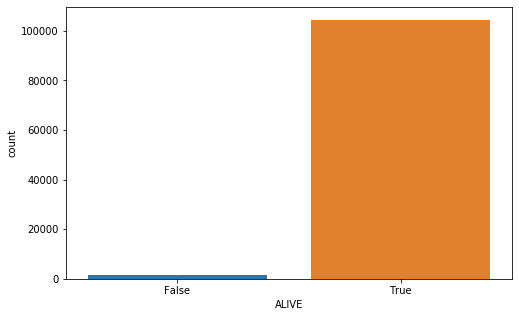

In [16]:
ax = sns.countplot(data = df, x = 'ALIVE')
plt.gcf().set_size_inches(8,5)

In [17]:
percentage_alive = np.mean(df['ALIVE'] == True) * 100
percentage_dead = np.mean(df['ALIVE'] == False) * 100
print("Percentage of patients classified as alive: %.2f" % percentage_alive)
print("Percentage of patients classified as dead: %.2f" % percentage_dead)

Percentage of patients classified as alive: 98.72
Percentage of patients classified as dead: 1.28


In [18]:
df.dtypes

PATIENTID            int64
SEX               category
ETHNICITY         category
NUMBER_TUMOURS       int64
SC500                 bool
SC501                 bool
SC502                 bool
SC503                 bool
SC504                 bool
SC505                 bool
SC506                 bool
SC508                 bool
BEH_BENIGN            bool
BEH_MALIG             bool
BEH_MICINV            bool
BEH_INSITU            bool
BEH_UNCERT            bool
STAGE0                bool
STAGE1                bool
STAGE2                bool
STAGE3                bool
STAGE4                bool
GRADE1                bool
GRADE2                bool
GRADE3                bool
GRADE4                bool
AGE_MEAN           float64
L0801                 bool
L1001                 bool
L1701                 bool
L0201                 bool
L0401                 bool
L1201                 bool
L0301                 bool
L0901                 bool
ER_POS                bool
ER_NEG                bool
P

In [19]:
new_memory = df.memory_usage(deep = True).sum() / 1024 ** 2 
print('Memory used: %.1f GB' % new_memory)

Memory used: 14.3 GB


In [20]:
df.columns

Index(['PATIENTID', 'SEX', 'ETHNICITY', 'NUMBER_TUMOURS', 'SC500', 'SC501',
       'SC502', 'SC503', 'SC504', 'SC505', 'SC506', 'SC508', 'BEH_BENIGN',
       'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU', 'BEH_UNCERT', 'STAGE0',
       'STAGE1', 'STAGE2', 'STAGE3', 'STAGE4', 'GRADE1', 'GRADE2', 'GRADE3',
       'GRADE4', 'AGE_MEAN', 'L0801', 'L1001', 'L1701', 'L0201', 'L0401',
       'L1201', 'L0301', 'L0901', 'ER_POS', 'ER_NEG', 'PR_POS', 'PR_NEG',
       'HER_POS', 'HER_NEG', 'CURATIVE', 'NONCURATIVE', 'NOACTTREAT', 'ECOG0',
       'ECOG1', 'ECOG2', 'ECOG3', 'ECOG4', 'ACE0', 'ACE1', 'ACE2', 'ACE3',
       'LEFT', 'RIGHT', 'MIDLINE', 'BILATERAL', 'DEPR1', 'DEPR2', 'DEPR3',
       'DEPR4', 'DEPR5', 'ALIVE'],
      dtype='object')

In [21]:
df = pd.concat([df[['PATIENTID', 'ALIVE', 'NUMBER_TUMOURS',
       'SC500', 'SC501', 'SC502', 'SC503', 'SC504', 'SC505', 'SC506', 'SC508',
       'BEH_BENIGN', 'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU', 'BEH_UNCERT',
       'STAGE0', 'STAGE1', 'STAGE2', 'STAGE3', 'STAGE4', 'GRADE1', 'GRADE2',
       'GRADE3', 'GRADE4', 'AGE_MEAN', 'L0801', 'L1001', 'L1701', 'L0201',
       'L0401', 'L1201', 'L0301', 'L0901', 'ER_POS', 'ER_NEG', 'PR_POS',
       'PR_NEG', 'HER_POS', 'HER_NEG', 'CURATIVE', 'NONCURATIVE', 'NOACTTREAT',
       'ECOG0', 'ECOG1', 'ECOG2', 'ECOG3', 'ECOG4', 'ACE0', 'ACE1', 'ACE2',
       'ACE3', 'LEFT', 'RIGHT', 'MIDLINE', 'BILATERAL', 'DEPR1', 'DEPR2',
       'DEPR3', 'DEPR4', 'DEPR5']],                      
                      pd.get_dummies(df['SEX'], prefix='SEX'),                      
                      pd.get_dummies(df['ETHNICITY'], prefix='ETHNICITY'),                                                             
                      ], axis=1)
df.head()

,PATIENTID,ALIVE,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,ER_NEG,PR_POS,PR_NEG,HER_POS,HER_NEG,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,SEX_F,SEX_M,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean
624,10000724,True,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
650,10000752,True,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
913,10001050,True,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1543,10001750,True,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1613,10001824,True,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [22]:
df.isna().sum()

PATIENTID                                  0
ALIVE                                      0
NUMBER_TUMOURS                             0
SC500                                      0
SC501                                      0
SC502                                      0
SC503                                      0
SC504                                      0
SC505                                      0
SC506                                      0
SC508                                      0
BEH_BENIGN                                 0
BEH_MALIG                                  0
BEH_MICINV                                 0
BEH_INSITU                                 0
BEH_UNCERT                                 0
STAGE0                                     0
STAGE1                                     0
STAGE2                                     0
STAGE3                                     0
STAGE4                                     0
GRADE1                                     0
GRADE2    

In [23]:
X = df[['NUMBER_TUMOURS', 'SC500', 'SC501',
       'SC502', 'SC503', 'SC504', 'SC505', 'SC506', 'SC508', 'BEH_BENIGN',
       'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU', 'BEH_UNCERT', 'STAGE0',
       'STAGE1', 'STAGE2', 'STAGE3', 'STAGE4', 'GRADE1', 'GRADE2', 'GRADE3',
       'GRADE4', 'AGE_MEAN', 'L0801', 'L1001', 'L1701', 'L0201', 'L0401',
       'L1201', 'L0301', 'L0901', 'ER_POS', 'ER_NEG', 'PR_POS', 'PR_NEG',
       'HER_POS', 'HER_NEG', 'CURATIVE', 'NONCURATIVE', 'NOACTTREAT', 'ECOG0',
       'ECOG1', 'ECOG2', 'ECOG3', 'ECOG4', 'ACE0', 'ACE1', 'ACE2', 'ACE3',
       'LEFT', 'RIGHT', 'MIDLINE', 'BILATERAL', 'DEPR1', 'DEPR2', 'DEPR3',
       'DEPR4', 'DEPR5', 'SEX_F', 'SEX_M', 'ETHNICITY_Asian Bangladeshi',
       'ETHNICITY_Asian Indian', 'ETHNICITY_Asian Pakistani',
       'ETHNICITY_Black African', 'ETHNICITY_Black Caribbean',
       'ETHNICITY_Chinese', 'ETHNICITY_Mixed white and Asian',
       'ETHNICITY_Mixed white and black African', 'ETHNICITY_Other',
       'ETHNICITY_Other Asian background', 'ETHNICITY_Other black background',
       'ETHNICITY_Other ethnic group', 'ETHNICITY_Other mixed background',
       'ETHNICITY_Other white background', 'ETHNICITY_White',
       'ETHNICITY_White British', 'ETHNICITY_White Irish',
       'ETHNICITY_White and black Caribbean']]

In [24]:
y = df['ALIVE']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [26]:
y_train.value_counts()

True     93895
False     1222
Name: ALIVE, dtype: int64

In [27]:
y_test.value_counts()

True     10438
False      131
Name: ALIVE, dtype: int64

In [28]:
df.dtypes

PATIENTID                                    int64
ALIVE                                         bool
NUMBER_TUMOURS                               int64
SC500                                         bool
SC501                                         bool
SC502                                         bool
SC503                                         bool
SC504                                         bool
SC505                                         bool
SC506                                         bool
SC508                                         bool
BEH_BENIGN                                    bool
BEH_MALIG                                     bool
BEH_MICINV                                    bool
BEH_INSITU                                    bool
BEH_UNCERT                                    bool
STAGE0                                        bool
STAGE1                                        bool
STAGE2                                        bool
STAGE3                         

In [29]:
logr = LogisticRegression()
logr.fit(X_train,y_train)

/home/elsa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
cross_val_score(logr, X_train, y_train, cv = 10, scoring = "accuracy").mean()

/home/elsa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/elsa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/elsa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/elsa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/elsa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

0.9871526673999904

In [31]:
cross_val_score(logr, X_train, y_train, cv = 10, scoring = "recall").mean()

/home/elsa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/elsa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/elsa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/elsa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/elsa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1.0

In [32]:
cross_val_score(logr, X_train, y_train, cv = 10, scoring = "precision").mean()

/home/elsa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/elsa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/elsa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/elsa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/elsa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

0.9871526673999904

In [39]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted, labels=[True, False]) 
print(confusion_matrix)

NameError: name 'y_predicted' is not defined

In [ ]:
# clfSVC = SVC(kernel = "linear", C = 10)

In [ ]:
# clfSVC.fit(X_train, y_train)

In [ ]:
# cross_val_score(clfSVC, X_train, y_train, scoring = "recall").mean()

In [ ]:
clfTree = DecisionTreeClassifier(min_samples_leaf = 20, max_depth = 3)

In [ ]:
clfTree.fit(X, y)

In [ ]:
target_pos = 1 # Or 0 for the other class
fp,tp,_ = roc_curve(y_train, clfTree.best_estimator_.predict_proba(X_train)[:,target_pos])

In [ ]:
plt.plot(fp,tp);

In [ ]:
auc(fp,tp)

In [ ]:
cross_val_score(clfTree,X,y,cv=5,scoring="roc_auc").mean()